In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import numpy as np
from keras.datasets import mnist


In [2]:
# data: separando os dados em conjunto de treinamento e conjunto de teste
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#X_train é um vetor de 60.000 amostras de tamanho 28x28 --> reshaped vai tranformar em 60.000 x 784
RESHAPED = 784
NB_CLASSES = 10
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizar os dados

X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train sample')
print(X_test.shape[0], 'test samples')

# Convertendo o vetor de classes em binários
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 

60000 train sample
10000 test samples


In [3]:
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
print(Y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [9]:
classificador = Sequential()
classificador.add(Dense(units = 16, activation = 'relu', input_dim = 784))
#classificador.add(Dense(units = 4, activation = 'relu'))
classificador.add(Dense(units = 10, activation = 'softmax'))
classificador.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
                      metrics = ['categorical_accuracy'])
classificador.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                12560     
                                                                 
 dense_7 (Dense)             (None, 10)                170       
                                                                 
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = classificador.fit(X_train, Y_train, batch_size = 10,epochs = 100, verbose = 1, validation_split=0.2)
#history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/100
4800/4800 [==============================] - 19s 3ms/step - loss: 0.3802 - categorical_accuracy: 0.8930 - val_loss: 0.2490 - val_categorical_accuracy: 0.9264
Epoch 2/100
4800/4800 [==============================] - 17s 4ms/step - loss: 0.2361 - categorical_accuracy: 0.9318 - val_loss: 0.2096 - val_categorical_accuracy: 0.9415
Epoch 3/100
4800/4800 [==============================] - 16s 3ms/step - loss: 0.2058 - categorical_accuracy: 0.9393 - val_loss: 0.2195 - val_categorical_accuracy: 0.9358
Epoch 4/100
4800/4800 [==============================] - 16s 3ms/step - loss: 0.1892 - categorical_accuracy: 0.9454 - val_loss: 0.2028 - val_categorical_accuracy: 0.9417
Epoch 5/100
4800/4800 [==============================] - 16s 3ms/step - loss: 0.1759 - categorical_accuracy: 0.9490 - val_loss: 0.2000 - val_categorical_accuracy: 0.9442
Epoch 6/100
4800/4800 [==============================] - 17s 3ms/step - loss: 0.1670 - categorical_accuracy: 0.9510 - val_loss: 0.1870 - val_categoric

Epoch 49/100
4800/4800 [==============================] - 16s 3ms/step - loss: 0.0858 - categorical_accuracy: 0.9735 - val_loss: 0.2267 - val_categorical_accuracy: 0.9477
Epoch 50/100
4800/4800 [==============================] - 17s 4ms/step - loss: 0.0863 - categorical_accuracy: 0.9730 - val_loss: 0.2254 - val_categorical_accuracy: 0.9483
Epoch 51/100
4800/4800 [==============================] - 16s 3ms/step - loss: 0.0855 - categorical_accuracy: 0.9730 - val_loss: 0.2272 - val_categorical_accuracy: 0.9477
Epoch 52/100
4800/4800 [==============================] - 19s 4ms/step - loss: 0.0848 - categorical_accuracy: 0.9734 - val_loss: 0.2339 - val_categorical_accuracy: 0.9467
Epoch 53/100
4800/4800 [==============================] - 17s 4ms/step - loss: 0.0831 - categorical_accuracy: 0.9738 - val_loss: 0.2439 - val_categorical_accuracy: 0.9446
Epoch 54/100
4800/4800 [==============================] - 17s 4ms/step - loss: 0.0836 - categorical_accuracy: 0.9735 - val_loss: 0.2288 - val_cat

Epoch 97/100
4800/4800 [==============================] - 17s 3ms/step - loss: 0.0621 - categorical_accuracy: 0.9803 - val_loss: 0.3185 - val_categorical_accuracy: 0.9418
Epoch 98/100
4800/4800 [==============================] - 19s 4ms/step - loss: 0.0621 - categorical_accuracy: 0.9798 - val_loss: 0.3082 - val_categorical_accuracy: 0.9431
Epoch 99/100
4800/4800 [==============================] - 17s 4ms/step - loss: 0.0628 - categorical_accuracy: 0.9800 - val_loss: 0.3129 - val_categorical_accuracy: 0.9427
Epoch 100/100
4800/4800 [==============================] - 17s 4ms/step - loss: 0.0620 - categorical_accuracy: 0.9795 - val_loss: 0.3059 - val_categorical_accuracy: 0.9443


In [11]:
score = classificador.evaluate(X_test, Y_test, verbose=1)
print('Test score', score[0])
print('Test accuracy', score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.2956 - categorical_accuracy: 0.9466
Test score 0.29563775658607483
Test accuracy 0.9466000199317932


In [12]:
resultado = classificador.evaluate(X_test, Y_test, verbose=1)
previsoes = classificador.predict(X_test)
previsoes = (previsoes > 0.5)
import numpy as np
classe_teste2 = [np.argmax(t) for t in Y_test]
previsoes2 = [np.argmax(t) for t in previsoes]

from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(previsoes2, classe_teste2)

313/313 [==============================] - 1s 2ms/step


In [13]:
print(matriz)

[[ 955    3   10    5    5    9   11    4   10    9]
 [   1 1110    3    3    2    3    2    4    6    4]
 [   2    5  969   13    4    2    6   16    4    2]
 [   3    0   15  932    0   14    0   10   12    4]
 [   2    0    6    3  937    6   13    5   12   24]
 [   4    1    3   27    2  831    8    1    6   10]
 [   4    3    5    3   10    9  909    0    5    1]
 [   4    5   12    8    2    4    1  974    7   16]
 [   1    8    9   11    2    9    7    3  906    6]
 [   4    0    0    5   18    5    1   11    6  933]]


In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

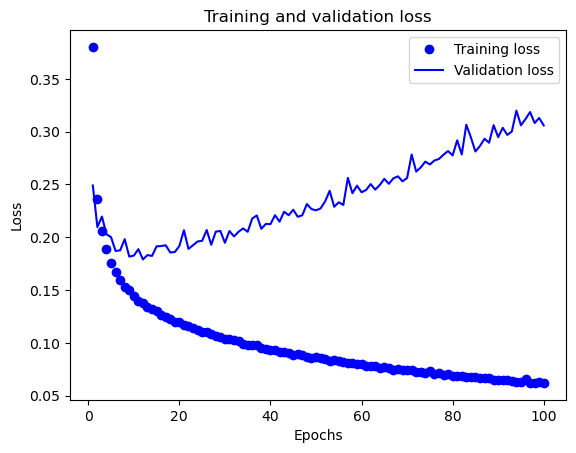

In [15]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

#epochs = range(1, len('accuracy') + 1)
epochs = np.arange(1,100 + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

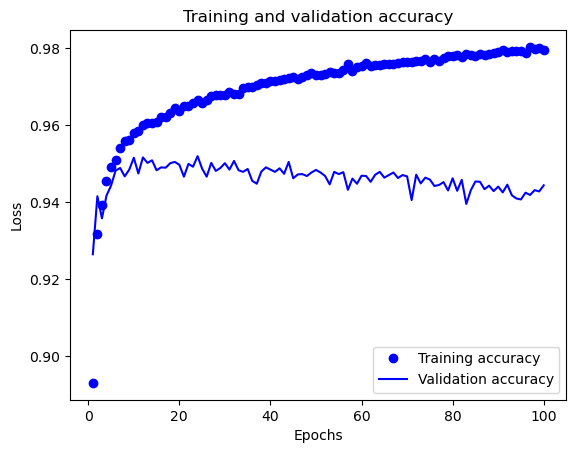

In [16]:
acc_values = history_dict['categorical_accuracy']
val_acc_values = history_dict['val_categorical_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [29]:
resultado = classificador.evaluate(X_teste, Y_teste)
previsoes = classificador.predict(Y_teste)
previsoes = (previsoes > 0.5)
import numpy as np
classe_teste2 = [np.argmax(t) for t in X_teste]
previsoes2 = [np.argmax(t) for t in previsoes]

from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(previsoes2, classe_teste2)

NameError: name 'X_teste' is not defined

In [16]:
print(matriz)

[[14  0  0]
 [ 0  9  1]
 [ 0  0 14]]
